# 22장 거짓말, 새빨간 거짓말 그리고 통계학

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/python4daml/blob/main/22장.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

In [1]:
import matplotlib.pyplot as plt

#선 두께
plt.rcParams['lines.linewidth'] = 4
#제목 폰트 크기
plt.rcParams['axes.titlesize'] = 16
#축 레이블 폰트 크기
plt.rcParams['axes.labelsize'] = 16
#x 축 텍스트 크기
plt.rcParams['xtick.labelsize'] = 16
#y 축 텍스트 크기
plt.rcParams['ytick.labelsize'] = 16
#x 축 눈금 크기
plt.rcParams['xtick.major.size'] = 7
#y 축 눈금 크기
plt.rcParams['ytick.major.size'] = 7
#마커 크기
plt.rcParams['lines.markersize'] = 10
#범례를 표시할 때 마커 표시 개수
plt.rcParams['legend.numpoints'] = 1
#범례 텍스트 크기
plt.rcParams['legend.fontsize'] = 14

In [2]:
# 코랩에서 실행하는 경우 다음 코드의 주석을 해제하고 실행하세요.
#!wget https://raw.githubusercontent.com/rickiepark/python4daml/main/midWestHousingPrices.csv

## 22.1 가비지 인 가비지 아웃 (GIGO)

## 22.2 테스트는 불완전합니다

## 22.3 그래프에 속을 수 있습니다

그림 22-2 주택 가격 그래프 그리기

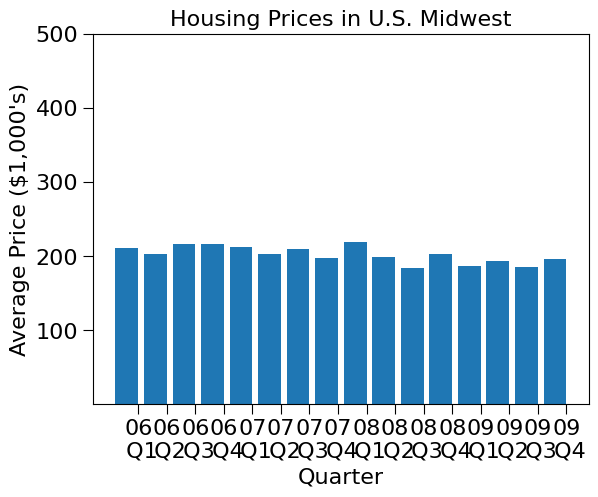

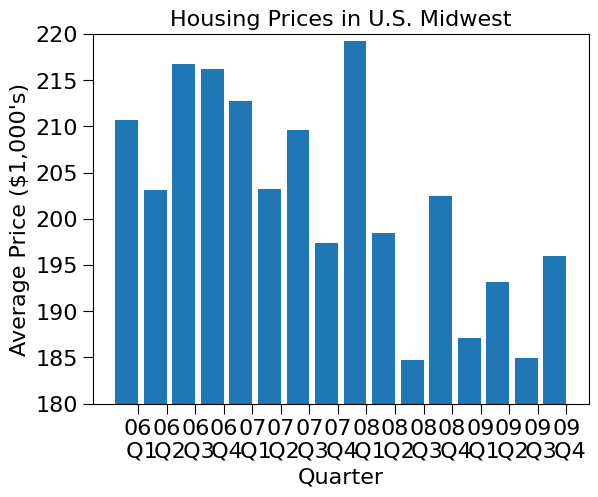

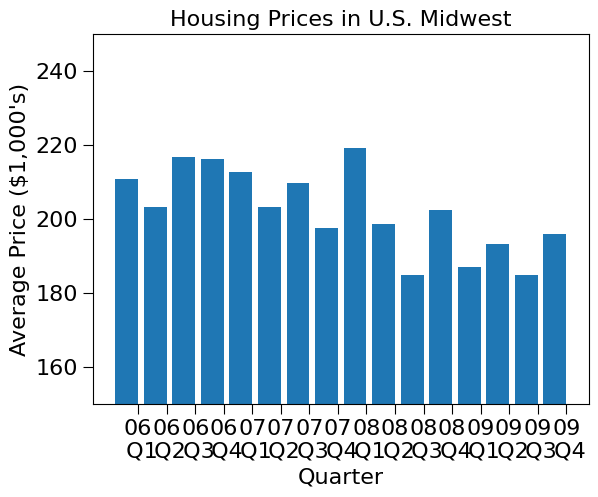

In [3]:
import numpy as np

def plot_housing(impression):
    """impression은 문자열로 'flat', 'volatile', 'fair' 중 하나라고 가정합니다.
       시간에 따른 주택 가격 그래프를 그립니다"""
    labels, prices = ([], [])
    with open('midWestHousingPrices.csv', 'r') as f:
        #파일의 각 라인은 미국 중서부 지역의 한 분기 가격을 담고 있습니다.
        for line in f:
            year, quarter, price = line.split(',')
            label = year[2:4] + '\n Q' + quarter[1]
            labels.append(label)
            prices.append(int(price)/1000)
    quarters = np.arange(len(labels)) #막대의 x 좌표
    width = 0.8 #막대 너비
    plt.bar(quarters, prices, width)
    plt.xticks(quarters+width/2, labels)
    plt.title('Housing Prices in U.S. Midwest')
    plt.xlabel('Quarter')
    plt.ylabel('Average Price ($1,000\'s)')
    if impression == 'flat':
        plt.ylim(1, 500)
    elif impression == 'volatile':
        plt.ylim(180, 220)
    elif impression == 'fair':
        plt.ylim(150, 250)
    else:
        raise ValueError

plot_housing('flat')
plt.figure()
plot_housing('volatile')
plt.figure()
plot_housing('fair')

**손가락 운동**

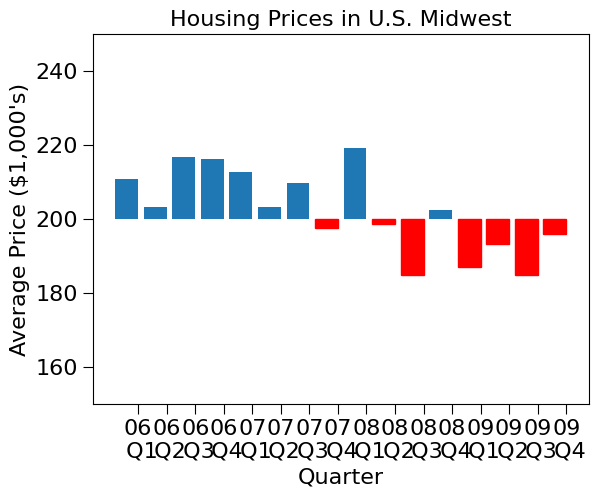

In [4]:
def plot_housing_baseline():
    """impression은 문자열로 'flat', 'volatile', 'fair' 중 하나라고 가정합니다.
       시간에 따른 주택 가격 그래프를 그립니다"""
    labels, prices = ([], [])
    with open('midWestHousingPrices.csv', 'r') as f:
        #파일의 각 라인은 미국 중서부 지역의 한 분기 가격을 담고 있습니다.
        for line in f:
            year, quarter, price = line.split(',')
            label = year[2:4] + '\n Q' + quarter[1]
            labels.append(label)
            prices.append(int(price)/1000)
    quarters = np.arange(len(labels)) #막대의 x 좌표
    width = 0.8 #막대 너비
    baseline = 200
    bars = plt.bar(quarters, np.array(prices) - baseline, width,
                    bottom = baseline)
    for b in bars:
        if b.get_height() < 0:
            b.set_color('r')
    plt.xticks(quarters+width/2, labels)
    plt.title('Housing Prices in U.S. Midwest')
    plt.xlabel('Quarter')
    plt.ylabel('Average Price ($1,000\'s)')
    plt.ylim(150, 250)

plot_housing_baseline()

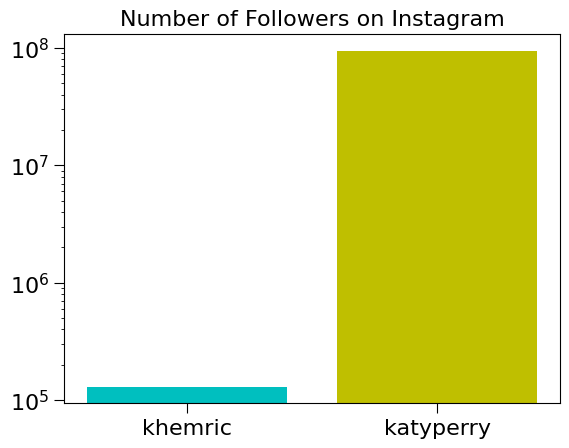

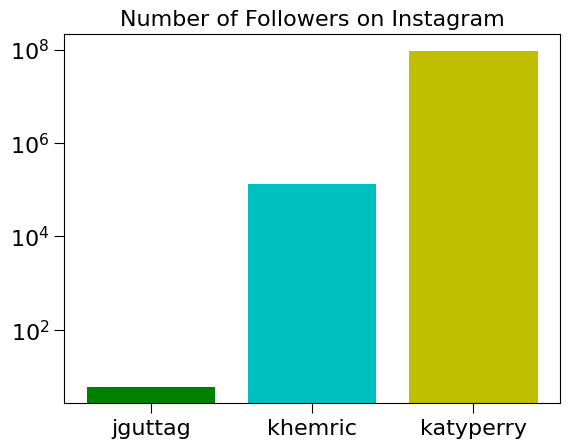

In [5]:
def plot_followers(with_jguttag):
    if with_jguttag:
        plt.bar('jguttag', 6, color = 'g')
    plt.bar('khemric', 130000, color = 'c')
    plt.bar('katyperry', 95000000, color = 'y')
    plt.title('Number of Followers on Instagram')
    plt.semilogy()
    
plot_followers(False)
plt.figure()
plot_followers(True)

## 22.6 샘플링 편향

## 22.7 맥락이 중요합니다

## 22.8 사과와 오렌지 비교하기

## 22.9 체리 피킹

## 22.10 외삽에 주의하세요

## 22.11 텍사스 명사수의 오류

그림 22-13 6월에 48명의 거식증 환자가 태어날 확률

In [6]:
import random

def june_prob(num_trials):
    june_48 = 0
    for trial in range(num_trials):
        june = 0
        for i in range(446):
            if random.randint(1,12) == 6:
                june += 1
        if june >= 48:
            june_48 += 1
    print('6월에 적어도 48명이 태어날 확률은 =', 
          round(june_48/num_trials, 4))

In [7]:
random.seed(0)
june_prob(10000)

6월에 적어도 48명이 태어날 확률은 = 0.0427


그림 22-14 어떤 달에 48명의 거식증 환자가 태어날 확률

In [8]:
def any_prob(num_trials):
    any_month_48 = 0
    for trial in range(num_trials):
        months = [0]*12
        for i in range(446):
            months[random.randint(0,11)] += 1
        if max(months) >= 48:
            any_month_48 += 1
    print('어떤 달에 적어도 48명이 태어날 확률은 =',
          round(any_month_48/num_trials, 4))

In [9]:
random.seed(0)
any_prob(10000)

어떤 달에 적어도 48명이 태어날 확률은 = 0.4357


## 22.12 백분율은 혼동하기 쉽습니다

## 22.13 회귀 오류

## 22.14 통계적으로 유희한 차이는 유의하지 않을 수 있습니다

In [10]:
import scipy.stats

scipy.stats.ttest_1samp([1, 1], 0.5)[1]

0.0

## 22.15 조심하세요